In [1]:
import gzip
import numpy as np
import struct
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
# load compressed MNIST gz files and return numpy arrays
def load_data(filename, label=False):
    with gzip.open(filename) as gz:
        struct.unpack('I', gz.read(4))
        n_items = struct.unpack('>I', gz.read(4))
        if not label:
            n_rows = struct.unpack('>I', gz.read(4))[0]
            n_cols = struct.unpack('>I', gz.read(4))[0]
            res = np.frombuffer(gz.read(n_items[0] * n_rows * n_cols), dtype=np.uint8)
            res = res.reshape(n_items[0], n_rows * n_cols)
        else:
            res = np.frombuffer(gz.read(n_items[0]), dtype=np.uint8)
            res = res.reshape(n_items[0], 1)
    return res


# one-hot encode a 1-D array
def one_hot_encode(array, num_of_classes):
    return np.eye(num_of_classes)[array.reshape(-1)]

In [3]:
X_train = load_data("data/MNIST/train-images-idx3-ubyte.gz") / 255.0
X_test = load_data("data/MNIST/t10k-images-idx3-ubyte.gz") / 255.0
y_train = load_data("data/MNIST/train-labels-idx1-ubyte.gz",True).reshape(-1)
y_test = load_data("data/MNIST/t10k-labels-idx1-ubyte.gz",True).reshape(-1)

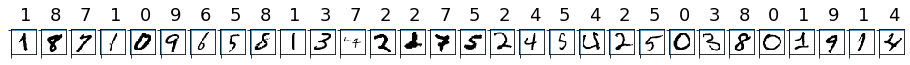

In [4]:
count = 0
sample_size = 30
plt.figure(figsize=(16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep = '\n')

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### add MLPClassifier code

In [6]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {"hidden_layer_sizes": [(50,),(100,)],
                             "solver": ['adam', 'sgd', 'lbfgs'],
                             "max_iter": [200],
                             "verbose": [True],
                              "learning_rate_init":[0.001]
                             }
mlp = MLPClassifier()
grid = GridSearchCV(mlp, param_grid, refit = True, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...e, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'h

In [18]:
print("Training set score: %f" % grid.score(X_train, y_train))
print("Test set score: %f" %  grid.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.975400


In [37]:
y_pre = mlp.predict(X_test)
type(y_pre)

numpy.ndarray

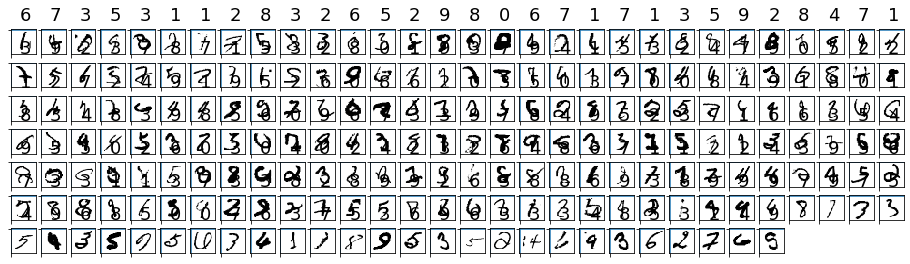

In [57]:
count = 0
sample_size = 10000
plt.figure(figsize=(16, 6))
for i in np.random.permutation(X_test.shape[0])[:sample_size]:
    if y_pre[i]!=y_test[i]:#预测结果错误
        count = count + 1
        plt.subplot(10, 30, count)
        plt.axhline('')
        plt.axvline('')
        plt.text(x=10, y=-10, s=y_pre[i], fontsize=18)
        plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()